In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Limit to 4 cores
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from scipy import integrate
import math
import S4
import time

In [2]:
## Consider only two materials
ns = 5  ## ns*ns square
for i in range(ns**2):
    x_pos = np.mod(i,ns) - int(ns/2) 
    y_pos = int(i/ns) -  int(ns/2)   
    print(f'({x_pos},{y_pos})')

(-2,-2)
(-1,-2)
(0,-2)
(1,-2)
(2,-2)
(-2,-1)
(-1,-1)
(0,-1)
(1,-1)
(2,-1)
(-2,0)
(-1,0)
(0,0)
(1,0)
(2,0)
(-2,1)
(-1,1)
(0,1)
(1,1)
(2,1)
(-2,2)
(-1,2)
(0,2)
(1,2)
(2,2)


In [ ]:
lx = 0.5
ly = 0.5
S = S4.New(Lattice=((lx,0),(0,ly)),NumBasis = 60)
S.SetMaterial(Name = 'SiO2',Epsilon = (1.45 )**2)
S.SetMaterial(Name = 'TiN',Epsilon = (2 + 0.9j)**2)
S.SetMaterial(Name = 'Vacuum',Epsilon = (1 )**2)

x_input =[1,0,1,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0] ## 25-bit from https://pubs.acs.org/doi/full/10.1021/acsami.3c08214  
#x_input =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] ## trivial

S.AddLayer(Name = 'AirAbove',Thickness = 0, Material = 'Vacuum')
S.AddLayer(Name = 'SiO2_d1',Thickness = 0.1, Material = 'SiO2')
layer_name = f'qr_code_layer'
S.AddLayer(Name = layer_name,Thickness = 0.025, Material = 'SiO2')
dx = lx/ns
dy = ly/ns
## for loop convert x_input to a qr_code structure
for i in range(ns**2):
    x_pos = (np.mod(i,ns) - int(ns/2)) * dx # 餘數
    y_pos = (int(i/ns) -  int(ns/2) ) * dy # 商數
    
    if x_input[i] == 1:
         S.SetRegionRectangle(
         Layer = layer_name,
         Material = 'TiN',
         Center = (x_pos,y_pos),
         Angle = 0,
         Halfwidths = (dx/2,dy/2)
         )

S.AddLayer(Name = 'SiO2_d3',Thickness = 0.070, Material = 'SiO2')
S.AddLayer(Name = 'TiNBelow',Thickness = 10,Material = 'TiN')## Need to a a thick layer of TiN as infinite substrate
S.AddLayer(Name = 'AirBelow',Thickness = 0, Material = 'Vacuum')
S.OutputLayerPatternPostscript(Layer = layer_name, Filename = 'qr.ps')
# ps2pdf qr.ps qr.pdf to get pdf
S.OutputStructurePOVRay(Filename = 'out.pov')
## install povray at the terminal,and use the command to generate image
## povray +Iout.pov +Oout.png +W1920 +H1080 +A0.3


S.SetExcitationPlanewave(
    IncidenceAngles=(
        0,# polar angle in [0,180)
        0 # azimuthal angle in [0,360)
    ),
    sAmplitude = 0,
    pAmplitude = 1,
    Order = 0
)

# frequency sweep
wavelength_space = np.linspace(0.3, 2.5, 250)

R = wavelength_space * 0
T = wavelength_space * 0
i=0
t = time.time()
for lam in wavelength_space:
    f = 1 / float(lam)
    S.SetFrequency(f)
    (forw,back) = S.GetPowerFlux(Layer = 'AirAbove', zOffset = 0)
    forw = S.GetPowerFlux(Layer = 'AirBelow', zOffset = 0)
    T[i] = np.abs(forw[0])
    R[i] = np.abs(back)
    i +=1
    print(i)
elapsed = time.time()-t;
print('Elapsed time = '+str(elapsed)+'s')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135


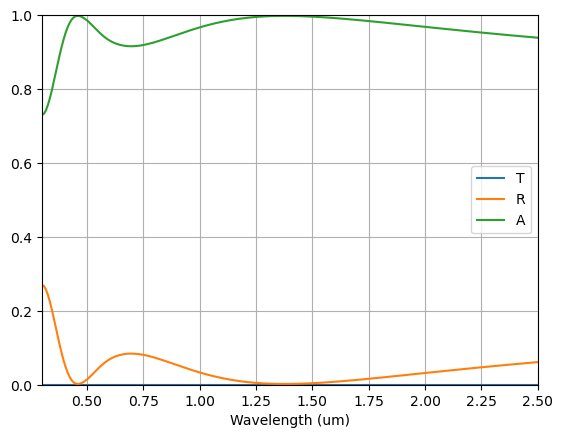

In [30]:
plt.plot(wavelength_space, T,label='T')
plt.plot(wavelength_space, R,label='R')
plt.plot(wavelength_space, 1-R-T,label='A')

#plt.plot(wavelength_space, T)
plt.xlabel('Wavelength (um)')
plt.legend()
plt.ylim([0,1])
plt.xlim([0.3,2.5])
plt.grid()

In [ ]:
plt.plot(wavelength_space, T,label='T')
plt.plot(wavelength_space, R,label='R')
plt.plot(wavelength_space, 1-R-T,label='A')

#plt.plot(wavelength_space, T)
plt.xlabel('Wavelength (um)')
plt.legend()
plt.ylim([0,1])
plt.xlim([0.3,2.5])
plt.grid()